**ЛАБОРАТОРНАЯ РАБОТА 10. ПОЛИНОМИАЛЬНАЯ 
РЕГРЕССИЯ**

**В качестве наборов ресурсов, я использую Real estate valuation data set.xlsx**

**Описание набора**

**Оценка недвижимости - это регрессионная задача. Набор рыночных исторических данных для оценки недвижимости собран в районе Синдиан, Нью-Тайбэй, Тайвань. Набор данных был случайным образом разделён на обучающую выборку (2/3 образцов) и тестовую выборку (1/3 образцов).**

**Переменные таблицы:**

**Ввод данных осуществляется следующим образом**

 **No - ID**
 
 **X1 transaction date - Дата транзакции X1 = дата сделки (например, 2013.250=март 2013, 2013.500=июнь 2013 и т. д.)**
 
 **X2 house age - Возраст дома X2 = возраст дома (единица измерения: год)**
 
 **X3 distance to the nearest MRT station - Расстояние в 3 раза до ближайшей станции метро = расстояние до ближайшей станции метро (единица измерения: метр)**

 **X4 number of convenience stores - Количество круглосуточных магазинов X4 = количество магазинов шаговой доступности в радиусе пешей доступности (целое число)**
 
 **X5 latitude - X5 latitude = географическая координата, широта. (единица измерения: градус)**
 
 **X6 longitude - X6 долгота =географическая координата, долгота. (единица измерения: градус)**
 
 **Результат выглядит следующим образом**
 
 **Y house price of unit area - Y = цена за квадратный метр жилья (10000 новых тайваньских долларов/пин, где пин — местная единица измерения, 1 пин = 3,3 квадратного метра)**



**Для выполнения 10 лабораторной работы, необходимо - Постройте модель полиномиальной регрессии с использованием. 
Проанализируйте кривые аппроксимации при различных степенях полинома**

Первые строки набора данных:
   No  X1 transaction date  X2 house age  \
0   1          2012.916667          32.0   
1   2          2012.916667          19.5   
2   3          2013.583333          13.3   
3   4          2013.500000          13.3   
4   5          2012.833333           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3

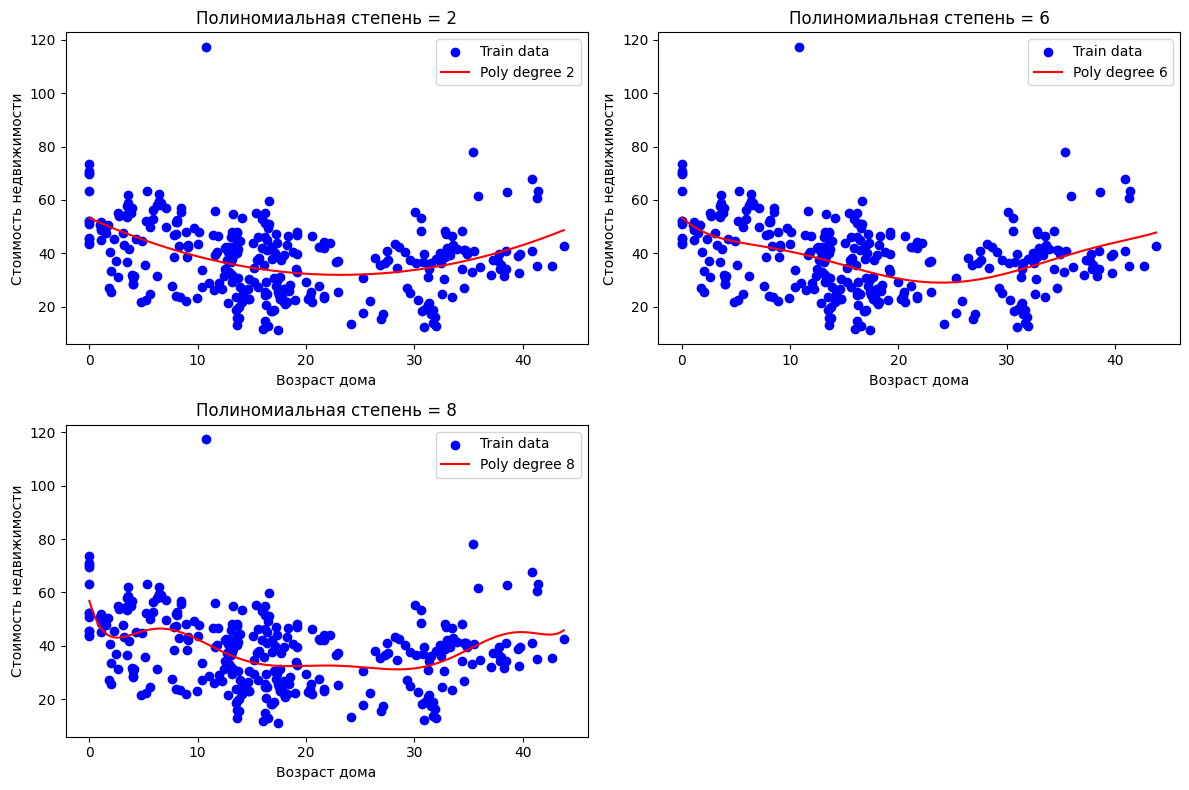


Оценка моделей с разными степенями полинома:
Степень 2: MSE = 127.20, MAE = 9.26
Степень 6: MSE = 126.69, MAE = 9.27
Степень 8: MSE = 128.16, MAE = 9.48


In [11]:
# Импорт необходимых библиотек
import numpy as np  # Библиотека для работы с числовыми массивами и математическими операциями
import pandas as pd  # Библиотека для работы с табличными данными
import matplotlib.pyplot as plt  # Библиотека для построения графиков
from sklearn.model_selection import train_test_split  # Модуль для разделения данных на обучающую и тестовую выборки
from sklearn.linear_model import LinearRegression  # Модуль для линейной регрессии
from sklearn.preprocessing import PolynomialFeatures  # Модуль для преобразования признаков в полиномиальные
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Метрики для оценки точности модели

# Загрузка данных
file_path = 'Real estate valuation data set.xlsx'  
dataset = pd.read_excel(file_path)  # Чтение данных из Excel-файла

# Выводим первые строки набора данных, чтобы убедиться в его корректности
print("Первые строки набора данных:")
print(dataset.head())  # Показываем первые 5 строк данных

# Выбираем нужные признаки для построения модели
# Например, используем 'X2 house age' (возраст дома) как единственный признак
X = dataset[['X2 house age']].values  # Признак (возраст дома) в виде массива numpy
y = dataset['Y house price of unit area'].values  # Целевая переменная — стоимость недвижимости

# Разделение на обучающую и тестовую выборки
# Используем 75% данных для обучения и 25% для тестирования модели
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Модели с разными степенями полинома
# Для анализа применим полиномиальные регрессии с степенями 2, 6 и 8
degrees = [2, 6, 8]
models = {}  # Словарь для хранения моделей для разных степеней
mse_values = []  # Список для хранения значений MSE
mae_values = []  # Список для хранения значений MAE

# Подготовка графиков
plt.figure(figsize=(12, 8))  # Размер фигуры для графиков

# Проходим по всем степеням полинома и строим модель для каждой степени
for degree in degrees:
    # Преобразуем признаки с полиномиальной степенью
    poly = PolynomialFeatures(degree=degree)  # Инициализируем преобразователь для полиномиальной регрессии
    X_poly_train = poly.fit_transform(X_train)  # Преобразуем обучающие данные
    X_poly_test = poly.transform(X_test)  # Преобразуем тестовые данные
    
    # Обучаем модель линейной регрессии на полиномиальных признаках
    model = LinearRegression()  # Инициализация линейной модели
    model.fit(X_poly_train, y_train)  # Обучение модели на преобразованных данных
    
    # Предсказания на тестовых данных
    y_pred = model.predict(X_poly_test)  # Прогнозируем значения для тестовой выборки
    
    # Оценка модели
    mse = mean_squared_error(y_test, y_pred)  # Среднеквадратичная ошибка
    mae = mean_absolute_error(y_test, y_pred)  # Средняя абсолютная ошибка
    mse_values.append(mse)  # Сохраняем значение MSE
    mae_values.append(mae)  # Сохраняем значение MAE
    
    # Сохраняем модель для дальнейшего использования
    models[degree] = model
    
    # Сгенерируем значения для визуализации кривой аппроксимации
    # Генерация значений для оси X для построения гладкой линии
    x_range = np.linspace(X_train.min(), X_train.max(), 1000).reshape(-1, 1)  # Генерируем 1000 точек для X в диапазоне данных
    x_range_poly = poly.transform(x_range)  # Преобразуем эти точки в полиномиальные признаки
    y_range = model.predict(x_range_poly)  # Получаем предсказания для этих точек
    
    # Построение графиков для каждого полинома
    plt.subplot(2, 2, degrees.index(degree) + 1)  # Размещение графиков в сетке 2x2
    plt.scatter(X_train, y_train, color='blue', label='Train data')  # График точек обучающей выборки
    plt.plot(x_range, y_range, color='red', label=f'Poly degree {degree}')  # График кривой аппроксимации
    plt.title(f'Полиномиальная степень = {degree}')  # Заголовок для графика
    plt.xlabel('Возраст дома')  # Ось X - возраст дома
    plt.ylabel('Стоимость недвижимости')  # Ось Y - стоимость недвижимости
    plt.legend()  # Легенда для графика

# Выводим все графики на экран
plt.tight_layout()  # Убираем пустое пространство между графиками
plt.show()

# Выводим метрики для разных степеней полинома
print("\nОценка моделей с разными степенями полинома:")
# Выводим значения MSE и MAE для каждой модели
for degree, mse, mae in zip(degrees, mse_values, mae_values):
    print(f"Степень {degree}: MSE = {mse:.2f}, MAE = {mae:.2f}")


**Сравнивая различные степени полинома, можно сделать вывод, что увеличение степени полинома не приводит к значительному улучшению точности модели. Наилучшие результаты были получены при использовании полинома второй степени (MSE = 127,20, MAE = 9,26), в то время как увеличение степени до 6 и 8 не привело к значительному улучшению и даже ухудшило результаты, что может указывать на переобучение модели.**
